In [1]:
from sklearn.ensemble import RandomForestRegressor
# 1.- Data Preparation
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  #pip install matplotlib if error



combi = pd.read_table('Historical_combi2.csv',delimiter =';')

combi=combi.fillna(0)
combi.dtypes
CO = combi.corr(method = 'kendall')
plt.rcParams['figure.dpi'] =300
ax = sns.heatmap(CO.iloc[0:,0:],vmin=-1, vmax=1, center=0,yticklabels=1,
    cmap=sns.diverging_palette(20, 220, n=100),
    square=True)

print(combi)



           Date  Dated Brent  Bonny light  Mars   WTI  Maya Europe  Maya USGC  \
0    01.01.2000         25.5          0.0   0.0   0.0          0.0        0.0   
1    01.02.2000         27.9          0.0   0.0   0.0          0.0        0.0   
2    01.03.2000         27.3          0.0   0.0   0.0          0.0        0.0   
3    01.04.2000         22.6          0.0   0.0   0.0          0.0        0.0   
4    01.05.2000         27.6          0.0   0.0   0.0          0.0        0.0   
..          ...          ...          ...   ...   ...          ...        ...   
231  01.04.2019         71.3          1.4  -2.3  -7.4         -9.8       -6.5   
232  01.05.2019         71.1          1.9  -4.3 -10.3        -10.1       -8.4   
233  01.06.2019         64.1          1.7  -4.6  -9.4         -8.1       -5.2   
234  01.07.2019         64.0          1.4  -2.0  -6.5         -6.9       -4.1   
235  01.08.2019         59.0          1.3  -1.9  -4.2        -12.6       -8.0   

     ESPO  Urals NWE  Urals

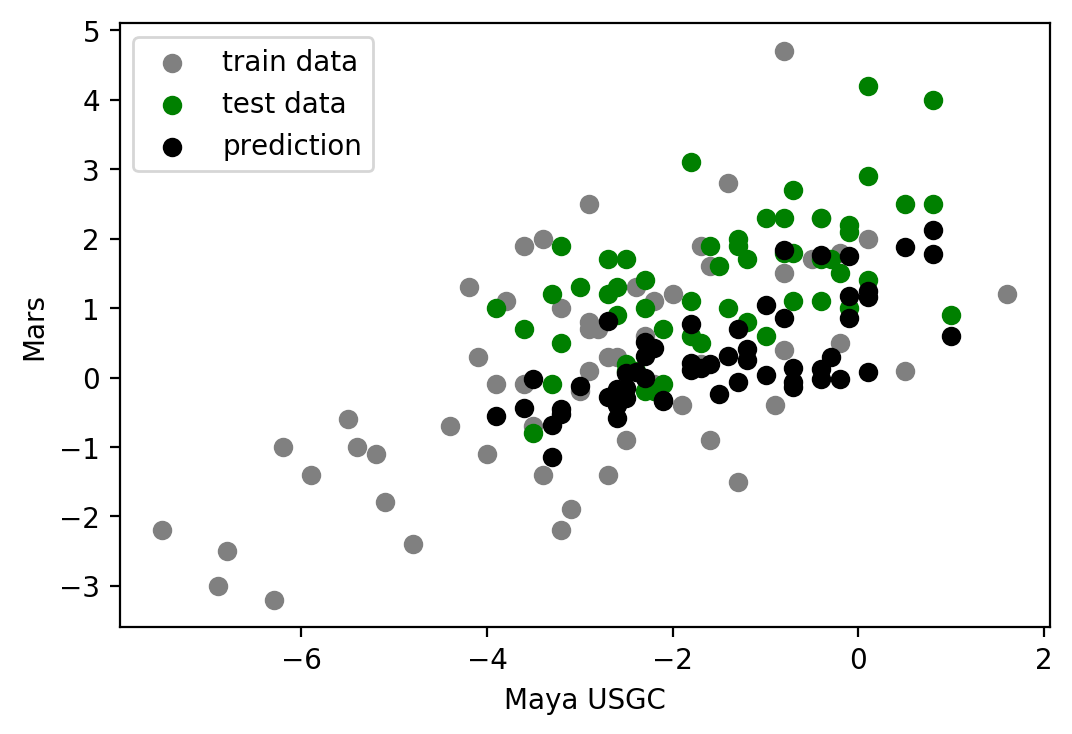

Mean squared error: 0.18
Feature ranking:
Feature Bonny light (0.011685)
Feature Butane (0.019165)
Feature Dated Brent (0.021444)
Feature Dubai (0.372235)
Feature FO 0.5% (0.000000)
Feature FO 1% (0.019275)
Feature FO 3.5% (0.023009)
Feature Gasoil (0.103833)
Feature Gasoline (0.022765)
Feature Jet (0.032682)
Feature LLS (0.038864)
Feature Mars (0.014092)
Feature Maya Europe (0.023248)
Feature Maya USGC (0.065605)
Feature Naphtha (0.021781)
Feature Propane (0.055811)
Feature ULSD (0.012544)
Feature Urals MED (0.067863)
Feature Urals NWE (0.015705)
Feature VGO 0.5% (0.012700)
Feature VGO 2% (0.024804)
Feature WTI (0.020890)


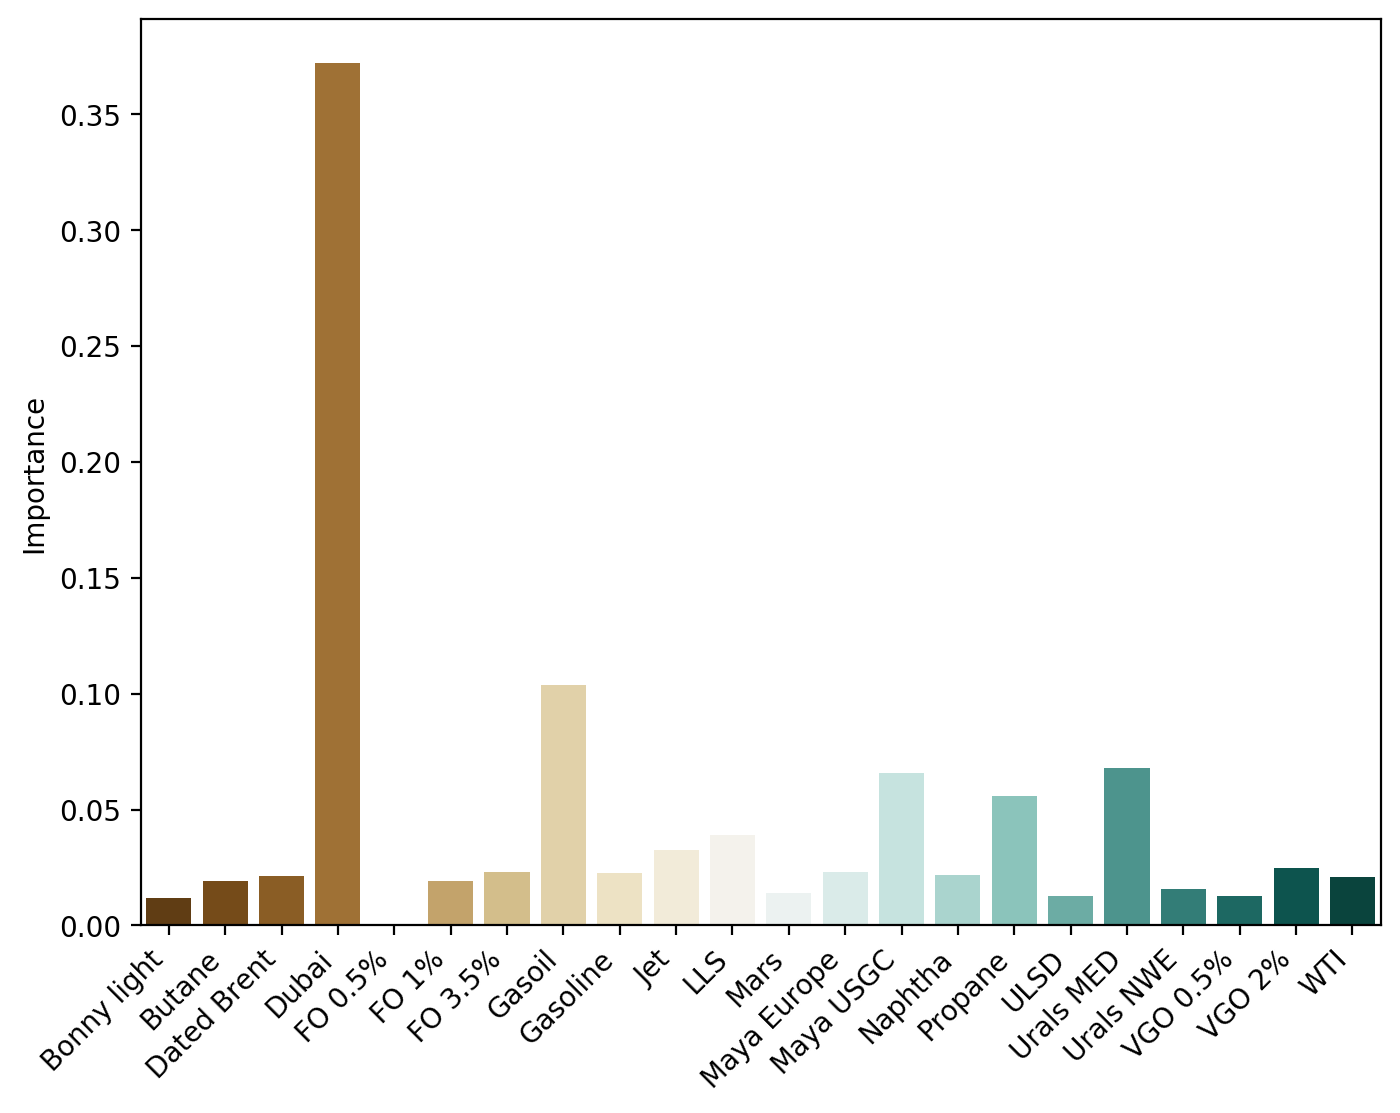

In [11]:
train_combi = combi.iloc[120:178,1:]
test_combi = combi.iloc[179:,1:]

plt.rcParams['figure.dpi'] = 200

#x_train=train_combi.drop("Maya Europe",axis=1)
x_train=train_combi[train_combi.columns.difference(["ESPO"])]
#x_train=train_combi[["Maya USGC","FO 3.5%", "FO 1%"]]
y_train=train_combi["ESPO"]

#df.drop('b', axis=1)

#x_test=train_combi.drop("Maya Europe",axis=1)
x_test=test_combi[test_combi.columns.difference(["ESPO"])]
#x_test=test_combi[["Maya USGC","FO 3.5%", "FO 1%"]]
y_test=test_combi["ESPO"].to_frame()



regressor = RandomForestRegressor(n_estimators=200, max_depth=5)

clf=regressor.fit(x_train, y_train)

y_pred=regressor.predict(x_test)
y_pred=pd.DataFrame(y_pred)


plt_train=plt.scatter(x_train["Dubai"],y_train,   color='grey')
plt_test=plt.scatter(x_test["Dubai"],y_test,   color='green')
plt_pred=plt.scatter(x_test["Dubai"], y_pred,  color='black')



plt.xlabel("Maya USGC")
plt.ylabel("Mars")
plt.legend((plt_train, plt_test,plt_pred),("train data", "test data","prediction"))
plt.show()

print("Mean squared error: %.2f"
      % np.mean((regressor.predict(x_train) - y_train) ** 2))

import seaborn as sns
importances=regressor.feature_importances_

indices=list(x_train)
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("Feature %s (%f)" % (indices[f], importances[f]))

f, (ax1) = plt.subplots(1, 1, figsize=(8, 6), sharex=True)
sns.barplot(indices, importances, palette="BrBG", ax=ax1)
ax1.set_ylabel("Importance")

ax1.set_xticklabels(
    ax1.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [8]:
data =  {'FO 3.5%':[-7.4],'Maya USGC':[-5.675], 'FO 1%':[-1.28]}
data_df = pd.DataFrame(data)
y_pred=regressor.predict(data_df)
print(y_pred)

[-1.51885047]
